# Introduction

I have always been curious about what my own data about my activities would look like and what it can tell me about my self that I don't notice. The Apple Health App definitely made it easy to track this although the data is not always complete so we have to be aware of any missing data as well. The gaps may indicate times I may not have an apple item on me such as my phone or watch.

## What do I hope to achieve from this?

Develop a better understanding in working with new data with Python, work with os, and generate some insights about myself that can hopefully be applied to anyone else as well such as habits. It's good to know how to work with different types of data so you can be more well rounded to fix any issues using different methods. On top of that, work on data manipulation and create simple visualizations so any type of audience could understand the thoughts and summaries.

The health, medical, and fitness industry is extremely vast and working with some related data could help me understand better on a person's well-being.

### Check out the Tableau Dashboard
https://public.tableau.com/profile/david.ly#!/vizhome/HealthStudyAnalytics/Dashboard

### Data

The data we wil be using is from the Apple Health app about my own personal health statistics. The data collection process requires me to have my phone or watch at all times besides the sleep data to be tracked. The date ranges from 2015 to the current date July 4, 2019. The older data is most likely from a third-party software that tracked sleep data which I haven't used since 2017.

Data constraints and issues we have to be aware of is that there is always going to be some sort of missing data whether it's between a certain timeframe or specific dates. For example, I may need to charge my devices so it is not on me the entire time or I may forget to attach a device to me while I do some exercises. Since the intent is purely for exploratory purposes, I am not too worried about the missing data.

The initial data format is an xml file extracted from Apple, which is parsed using a script develoeped by Nicholas J. Radcliffe, so thank you for that. The data is not parsed out completely with every single value, but there is good amount of information regardless.

### Background Information

### Characteristics

__Dimensions__
Different per file

__Features__
Main features used were:
- startDate
- value
- DailyDate

__Additional Notes__
Different per file

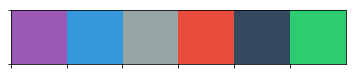

In [108]:
# Toolbox 101
import pandas as pd
# import pandas_profiling
import numpy as np
import random as rand
import datetime
import seaborn as sns
import os
import pprint
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")

# Preset data display
pd.options.display.max_seq_items = 1000
pd.options.display.max_rows = 1000

# Set palette
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette(flatui))

### Working with time examples

In [29]:
import time

print("Time in seconds since the epoch: %s" %time.time())
print("Current date and time: " , datetime.datetime.now())
print("Or like this: " ,datetime.datetime.now().strftime("%y-%m-%d-%H-%M"))

print("Current year: ", datetime.date.today().strftime("%Y"))
print("Month of year: ", datetime.date.today().strftime("%B"))
print("Week number of the year: ", datetime.date.today().strftime("%W"))
print("Weekday of the week: ", datetime.date.today().strftime("%w"))
print("Day of year: ", datetime.date.today().strftime("%j"))
print("Day of the month : ", datetime.date.today().strftime("%d"))
print("Day of week: ", datetime.date.today().strftime("%A"))

Time in seconds since the epoch: 1562470824.8869522
Current date and time:  2019-07-06 20:40:24.886952
Or like this:  19-07-06-20-40
Current year:  2019
Month of year:  July
Week number of the year:  26
Weekday of the week:  6
Day of year:  187
Day of the month :  06
Day of week:  Saturday


### Import libraries and collect all files

In [30]:
# Let's populate the entire Data folder to show all of the data parsed

# Set path and create an empty list/dataframe
pp = pprint.PrettyPrinter(indent=4)
files_list = []
file_df = pd.DataFrame(columns=['File', 'Size (Bytes)'])
data_dir = os.getcwd() + '\\Data'

# Loop through every file in the data folder and get file size
for files in os.listdir('Data'):
    
    # Create path to get file size
    path = os.path.join(data_dir, files)
    
    # Only search for csv files
    if files.endswith('.csv'):
        # Append to list
        files_list.append(files)
        
        # Append to df
        file_df = file_df.append({'File': str(files), 'Size (Bytes)': os.path.getsize(path)}, ignore_index=True)
        
        # Print
        print(files + ' - Size: ' + str(os.path.getsize(path)) + ' bytes\n')

ActiveEnergyBurned.csv - Size: 226427339 bytes

ActivitySummary.csv - Size: 21985 bytes

agg_energy_burned_data.csv - Size: 16448 bytes

AppleExerciseTime.csv - Size: 7444930 bytes

AppleStandHour.csv - Size: 2725752 bytes

BasalEnergyBurned.csv - Size: 146909563 bytes

BodyMass.csv - Size: 317 bytes

DistanceSwimming.csv - Size: 339 bytes

DistanceWalkingRunning.csv - Size: 28586612 bytes

FlightsClimbed.csv - Size: 1774682 bytes

HeartRate.csv - Size: 77521432 bytes

HeartRateVariabilitySDNN.csv - Size: 577065 bytes

Height.csv - Size: 203 bytes

HighHeartRateEvent.csv - Size: 7330 bytes

RestingHeartRate.csv - Size: 78979 bytes

SleepAnalysis.csv - Size: 1481126 bytes

StepCount.csv - Size: 19332492 bytes

study_data.csv - Size: 23801 bytes

SwimmingStrokeCount.csv - Size: 340 bytes

VO2Max.csv - Size: 4595 bytes

WalkingHeartRateAverage.csv - Size: 69922 bytes

Workout.csv - Size: 81085 bytes



First we created an empty list and an empty dataframe. You could create just the empty dataframe, but it was just for me to get some practice in as I started out with a list then added a dataframe afterwards after seeing that a dataframe might be more appropriate for analytical uses.

After creating the dataframe, add in the name and file size so we are able to sort it later by file size. We are also going to get the dimensions as well and add it into the dataframe if necessary.

These are all the files that was extracted from the Apple data excluding the study_data.csv which is manually tracked daily from Jan - Jun 2019. As we can see, there are a decent amount of files to work with. We can create summarized views and join the dates together to see if we can piece together the data together into information that can be useful.

### Sort to see which files have the most data

In [31]:
file_df.sort_values(by='Size (Bytes)', ascending=False)

,File,Size (Bytes)
0,ActiveEnergyBurned.csv,226427339
5,BasalEnergyBurned.csv,146909563
10,HeartRate.csv,77521432
8,DistanceWalkingRunning.csv,28586612
16,StepCount.csv,19332492
3,AppleExerciseTime.csv,7444930
4,AppleStandHour.csv,2725752
9,FlightsClimbed.csv,1774682
15,SleepAnalysis.csv,1481126
11,HeartRateVariabilitySDNN.csv,577065


It seems like Pandas has changed its API to avoid ambiguity when handling regex so we have to use the regex parameter in the replace method.

### File names only

In [32]:
# Get names to read 
names = file_df[file_df['File'] != 'BasalEnergyBurned.csv']['File'].replace('.csv', '', regex=True).reset_index(drop=True)
names

0           ActiveEnergyBurned
1              ActivitySummary
2       agg_energy_burned_data
3            AppleExerciseTime
4               AppleStandHour
5                     BodyMass
6             DistanceSwimming
7       DistanceWalkingRunning
8               FlightsClimbed
9                    HeartRate
10    HeartRateVariabilitySDNN
11                      Height
12          HighHeartRateEvent
13            RestingHeartRate
14               SleepAnalysis
15                   StepCount
16                  study_data
17         SwimmingStrokeCount
18                      VO2Max
19     WalkingHeartRateAverage
20                     Workout
Name: File, dtype: object

### Loop through the directory of all the csv files

Attempt to read this dynamically, although I just read it that it is better to manually create variables instead.

In [33]:
i=0

# Loop through the directory again
for files in os.listdir('Data'):
    
    # Only search for csv files
    if (files.endswith('.csv') & (files != 'BasalEnergyBurned.csv')):

        # TODO: create variable for every filename using names list
#         names[i] = pd.read_csv('Data\\' + files)
        
        # Add 1 to i
        i+=1
        
        # Print
        print('Reading ' + str(i) + '/' + str(len(names)) + '... ' + files)

Reading 1/21... ActiveEnergyBurned.csv
Reading 2/21... ActivitySummary.csv
Reading 3/21... agg_energy_burned_data.csv
Reading 4/21... AppleExerciseTime.csv
Reading 5/21... AppleStandHour.csv
Reading 6/21... BodyMass.csv
Reading 7/21... DistanceSwimming.csv
Reading 8/21... DistanceWalkingRunning.csv
Reading 9/21... FlightsClimbed.csv
Reading 10/21... HeartRate.csv
Reading 11/21... HeartRateVariabilitySDNN.csv
Reading 12/21... Height.csv
Reading 13/21... HighHeartRateEvent.csv
Reading 14/21... RestingHeartRate.csv
Reading 15/21... SleepAnalysis.csv
Reading 16/21... StepCount.csv
Reading 17/21... study_data.csv
Reading 18/21... SwimmingStrokeCount.csv
Reading 19/21... VO2Max.csv
Reading 20/21... WalkingHeartRateAverage.csv
Reading 21/21... Workout.csv


### Load the data

In [34]:
# Load the data manually, i'll try to get it in the for loop another time
ActiveEnergyBurned_data = pd.read_csv('Data\\ActiveEnergyBurned.csv')
ActivitySummary_data = pd.read_csv('Data\\ActivitySummary.csv')
AppleExerciseTime_data = pd.read_csv('Data\\AppleExerciseTime.csv')
AppleStandHour_data = pd.read_csv('Data\\AppleStandHour.csv')
BodyMass_data = pd.read_csv('Data\\BodyMass.csv')
DistanceWalkingRunning_data = pd.read_csv('Data\\DistanceWalkingRunning.csv')
FlightsClimbed_data = pd.read_csv('Data\\FlightsClimbed.csv')
HeartRate_data = pd.read_csv('Data\\HeartRate.csv')
HeartRateVariabilitySDNN_data = pd.read_csv('Data\\HeartRateVariabilitySDNN.csv')
Height_data = pd.read_csv('Data\\Height.csv')
HighHeartRateEvent_data = pd.read_csv('Data\\HighHeartRateEvent.csv')
RestingHeartRate_data = pd.read_csv('Data\\RestingHeartRate.csv')
SleepAnalysis_data = pd.read_csv('Data\\SleepAnalysis.csv')
StepCount_data = pd.read_csv('Data\\StepCount.csv')
study_data = pd.read_csv('Data\\study_data.csv')
Swimming_data = pd.read_csv('Data\\SwimmingStrokeCount.csv')
VO2Max_data = pd.read_csv('Data\\VO2Max.csv')
WalkingHeartRateAverage_data = pd.read_csv('Data\\WalkingHeartRateAverage.csv')
Workout_data = pd.read_csv('Data\\Workout.csv')

In [35]:
# Store all of the data variables in a list
data_list = [ActiveEnergyBurned_data, ActivitySummary_data, AppleExerciseTime_data, AppleStandHour_data,
             BodyMass_data, DistanceWalkingRunning_data, FlightsClimbed_data, HeartRate_data,
             HeartRateVariabilitySDNN_data, Height_data, HighHeartRateEvent_data, RestingHeartRate_data,
             SleepAnalysis_data, StepCount_data, study_data, Swimming_data, VO2Max_data, WalkingHeartRateAverage_data,
             Workout_data]

So we now have all of our data loaded. Let's take a look at the descriptions of some of these that look interesting.

### Some useful exploratory functions to use

In [36]:
'''

Some functions to start off with:

train.sample()                                           
train.describe()
    train.describe(include=['O'])
    train.describe(include='all')
train.head()
train.tail()
train.value_counts().sum()
train.isnull().sum()
train.count()
train.fillna()
    train.fillna(train[col].mode(), inplace=True)
train.mean()
train.median()
train.mode()
train.shape
train.info()

'''
print('')

## Active Energy Burned

This is our biggest file up to date. Let's take a look on what type of data is there.

In [37]:
# Select columns
useful_cols = ['type', 'unit', 'creationDate', 'startDate', 'endDate', 'value']
ActiveEnergyBurned_data = ActiveEnergyBurned_data[useful_cols]

# # Check top 5
# ActiveEnergyBurned_data.iloc[0:5,]

In [38]:
# Get data shape, info, columns, & dimensions
print ("*"*44)
print('********** Data shape: ' + str(ActiveEnergyBurned_data.shape) + '*'*10)

********************************************
********** Data shape: (867937, 6)**********


There is a total of approximately 868K rows with 9 total columns of data. 

The data has start and end times and is tracked up to seconds in detail. This looks good, but I think for the purpose of my summary data, I want to group it by day. We can make visualizations later either in the notebook if it looks good or in Tableau.

### Are there any nulls?

In [39]:
# Define a new function
def get_nulls(df):
    
    # Get null pct and counts
    null_cols = pd.DataFrame(df.isnull().sum().sort_values(ascending=False), columns=['Null Data Count'])
    null_cols_pct = pd.DataFrame(round(df.isnull().sum().sort_values(ascending=False)/len(df),2), columns=['Null Data Pct'])

    # Combine dataframes horizontally
    null_cols_df = pd.DataFrame(pd.concat([null_cols, null_cols_pct], axis=1))

    all_nulls = null_cols_df[null_cols_df['Null Data Pct']>0]

    # Print
    print('There are', len(all_nulls), 'columns with missing values.')
    return all_nulls

In [40]:
get_nulls(ActiveEnergyBurned_data)

There are 0 columns with missing values.


,Null Data Count,Null Data Pct


Great there are no missing values. I've taken a peek at the excel sheet and looked around as well to see if there seems to be data that can be classified as "missing" as well. This means that data may be inputted incorrectly and is not a real value or for any other wrong reason.

### Pandas profiling

This will do some heavy lifting for us. It will help us with methods like describe, dtypes, creating plots, and more. It's useful if I'm on a time crunch.

In [41]:
# pandas_profiling.ProfileReport(ActiveEnergyBurned_data[1:100000])

### Plotting a distribution plot of the values


 mu = 0 and sigma = 3



Text(0.5, 1.0, 'Value distribution')

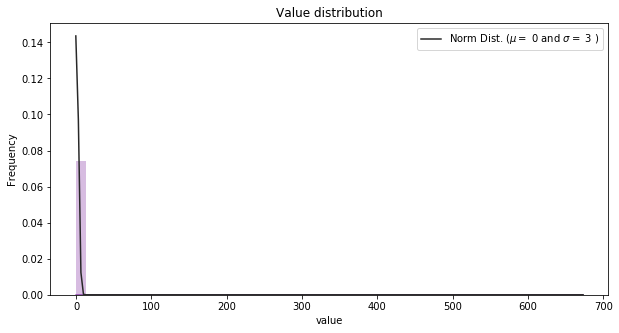

In [42]:
# Create figure space
plt.figure(figsize=(10,5))

# Create plot
sns.distplot(ActiveEnergyBurned_data['value'] , fit=norm)

# Get the fitted parameters
mu, sigma = norm.fit(ActiveEnergyBurned_data['value'])
print( '\n mu = {:.0f} and sigma = {:.0f}\n'.format(mu, sigma))

# Plot distribution
plt.legend(['Norm Dist. ($\mu=$ {:.0f} and $\sigma=$ {:.0f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Value distribution')

There are some serious outliers in this dataset, most likely values over ~ 30. Let's see how many there are and check the data itself.

In [43]:
# Print
print(ActiveEnergyBurned_data['value'][ActiveEnergyBurned_data.value>30].value_counts().sum(), 'count: 30+ values')
print(ActiveEnergyBurned_data['value'][ActiveEnergyBurned_data.value>40].value_counts().sum(), 'count: 40+ values')
print(ActiveEnergyBurned_data['value'][ActiveEnergyBurned_data.value>50].value_counts().sum(), 'count: 50+ values')

71 count: 30+ values
29 count: 40+ values
21 count: 50+ values


In [44]:
# 40+ values
ActiveEnergyBurned_data[ActiveEnergyBurned_data.value>40]

,type,unit,creationDate,startDate,endDate,value
703084,ActiveEnergyBurned,kcal,2019-04-11 10:56:11 -0700,2018-03-20 17:23:37 -0700,2018-03-20 17:28:26 -0700,45.543
703085,ActiveEnergyBurned,kcal,2019-04-11 10:56:11 -0700,2018-03-20 17:28:26 -0700,2018-03-20 17:32:53 -0700,42.653
703086,ActiveEnergyBurned,kcal,2019-04-11 10:56:12 -0700,2018-03-20 17:32:53 -0700,2018-03-20 17:37:24 -0700,40.907
723467,ActiveEnergyBurned,kcal,2019-04-17 13:28:41 -0700,2018-01-11 19:24:54 -0700,2018-01-11 19:29:44 -0700,46.944
733572,ActiveEnergyBurned,kcal,2019-04-20 08:33:47 -0700,2018-04-15 17:36:33 -0700,2018-04-15 17:41:35 -0700,45.965
733573,ActiveEnergyBurned,kcal,2019-04-20 08:33:48 -0700,2018-04-15 17:41:35 -0700,2018-04-15 17:46:04 -0700,44.261
808309,ActiveEnergyBurned,kcal,2019-05-23 18:35:56 -0700,2018-05-23 07:15:50 -0700,2018-05-23 07:19:56 -0700,41.577
815017,ActiveEnergyBurned,kcal,2019-06-03 21:56:52 -0700,2018-01-01 16:07:29 -0700,2018-01-01 17:28:01 -0700,475.868
815018,ActiveEnergyBurned,kcal,2019-06-03 22:06:43 -0700,2018-01-10 18:43:57 -0700,2018-01-10 20:21:57 -0700,659.538
815533,ActiveEnergyBurned,kcal,2019-06-04 12:54:31 -0700,2018-01-16 13:03:36 -0700,2018-01-16 20:34:30 -0700,671.063


So it looks like there is a huge jump in values in 2019. Can't think of some reasons why it would only do this recently. Maybe it tracked my movements in a long car ride? Home come this did not happen before? Was there a change in Apple's data collection process in an update?

Looking at it closer, the date difference is why it's happening. Most of the data is tracking every few minutes while the large numbers track over an hour! Wonder what am I doing differently? I am not going to remove the data but rather plot them without the outliers and group it by dates after to see a daily summary.


 mu = 0 and sigma = 3



Text(0.5, 1.0, 'Value distribution')

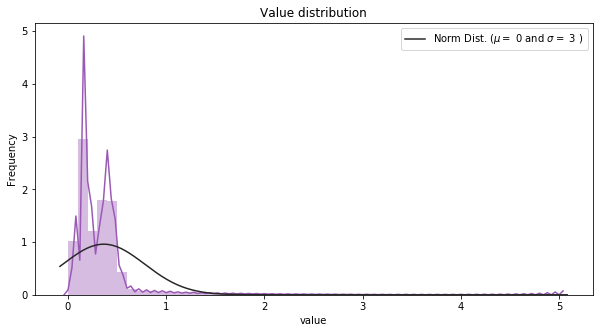

In [45]:
# Create figure space
plt.figure(figsize=(10,5))

# Create plot
sns.distplot(ActiveEnergyBurned_data['value'][ActiveEnergyBurned_data.value<5] , fit=norm)

# Get the fitted parameters
mu, sigma = norm.fit(ActiveEnergyBurned_data['value'])
print( '\n mu = {:.0f} and sigma = {:.0f}\n'.format(mu, sigma))

# Plot distribution
plt.legend(['Norm Dist. ($\mu=$ {:.0f} and $\sigma=$ {:.0f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Value distribution')

The data is still heavily right skewed (positive), which makes sense since I am currently living a sedentary lifestyle. I do try to opt in walks as much as possible but I've also been doing less of that ever since I started to study during my lunches.

If I dissect the data even less to < 5, the distribution is actually bimodel, something I don't see too often.

### Daily energy burned (time-series)

In [46]:
# Create new daily_date feature (2018-03-20 17:23:37 -0700)
t = (ActiveEnergyBurned_data.startDate[1])
" ".join(t.split()[0:1])

'2017-12-25'

In [47]:
ActiveEnergyBurned_data['dailyDate'] = ActiveEnergyBurned_data.startDate.apply(lambda x: " ".join(x.split()[0:1]))

In [48]:
ActiveEnergyBurned_data.head()

,type,unit,creationDate,startDate,endDate,value,dailyDate
0,ActiveEnergyBurned,kcal,2017-12-25 14:36:09 -0700,2017-12-25 13:34:57 -0700,2017-12-25 14:34:58 -0700,0.202,2017-12-25
1,ActiveEnergyBurned,kcal,2017-12-25 14:36:09 -0700,2017-12-25 14:34:58 -0700,2017-12-25 14:35:50 -0700,0.214,2017-12-25
2,ActiveEnergyBurned,kcal,2017-12-25 14:37:10 -0700,2017-12-25 14:35:50 -0700,2017-12-25 14:36:51 -0700,1.753,2017-12-25
3,ActiveEnergyBurned,kcal,2017-12-25 14:38:17 -0700,2017-12-25 14:36:51 -0700,2017-12-25 14:37:52 -0700,1.803,2017-12-25
4,ActiveEnergyBurned,kcal,2017-12-25 14:39:44 -0700,2017-12-25 14:37:52 -0700,2017-12-25 14:38:54 -0700,0.235,2017-12-25


In [49]:
''' Another method using dateutil
from dateutil import parser

print df
df2 = df.copy()
df2.date = df2.date.apply(lambda x: parser.parse(x))
df2
'''
print()

In [50]:
# Get only date and value columns
date_and_value = ['dailyDate', 'value']
series = ActiveEnergyBurned_data[date_and_value]
series = series[series.value<100]
series.dailyDate = pd.to_datetime(series.dailyDate, format='%Y-%m-%d')
# series = series.set_index(series.dailyDate)

### Resampling vs. groupby

Resampling is similar to a groupby: you split the time series into groups (5-day buckets below), apply a function to each group (mean), and combine the result (one row per group).

    series.resample('D').sum()
    
    series.groupby('dailyDate').value.sum()

[Note Link](https://tomaugspurger.github.io/modern-7-timeseries)

In [51]:
# Create a new dataframe for time series
daily_df = pd.DataFrame(series.groupby('dailyDate').value.sum()) # date needs to be the index

In [52]:
# Get first and last date
print(daily_df.head(1))
print(daily_df.tail(1))

              value
dailyDate          
2017-12-25  163.777
              value
dailyDate          
2019-07-02  338.523


<Figure size 1152x576 with 0 Axes>

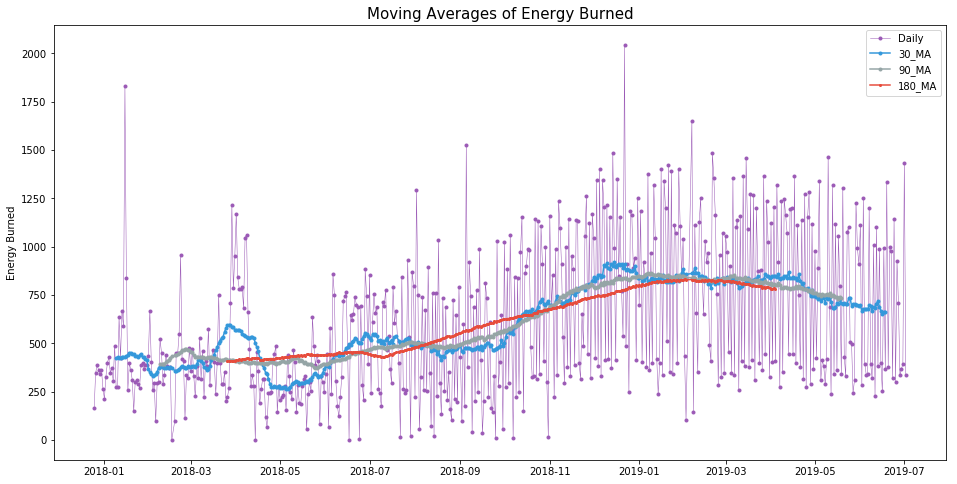

In [53]:
fig = plt.figure(figsize=(16,8))

# Rolling 30 days
ma_30 = daily_df["value"].rolling(window=30, center=True).mean()
ma_60 = daily_df["value"].rolling(window=60, center=True).mean()
ma_90 = daily_df["value"].rolling(window=90, center=True).mean()
ma_120 = daily_df["value"].rolling(window=120, center=True).mean()
ma_150 = daily_df["value"].rolling(window=150, center=True).mean()
ma_180 = daily_df["value"].rolling(window=180, center=True).mean()

# Combine moving averages with the daily data to replot
ts_daily_ma_data = pd.DataFrame({'Date': daily_df.index,
                                 'DailyValue': daily_df.value,
                                 '30_MA': ma_30,
                                 '60_MA': ma_60,
                                 '90_MA': ma_90,
                                 '120_MA': ma_120,
                                 '150_MA': ma_150,
                                 '180_MA': ma_180})

# Create time series chart without moving averages
# sns.tsplot(daily_df.value)

# Create time series with moving averages
# Start and end of the date range to extract
start, end = '2017-12-25', '2019-07-02'

# Set figure space 
fig, ax = plt.subplots(figsize=(16,8))

# Create plot
ax.plot(daily_df['value'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(ts_daily_ma_data['30_MA'], marker='o', markersize=3, linestyle='-', label='30_MA')
# ax.plot(ts_daily_ma_data['60_MA'], marker='o', markersize=3, linestyle='-', label='60_MA')
ax.plot(ts_daily_ma_data['90_MA'], marker='o', markersize=3, linestyle='-', label='90_MA')
# ax.plot(ts_daily_ma_data['120_MA'], marker='o', markersize=2, linestyle='-', label='120_MA')
# ax.plot(ts_daily_ma_data['150_MA'], marker='o', markersize=2, linestyle='-', label='150_MA')
ax.plot(ts_daily_ma_data['180_MA'], marker='o', markersize=2, linestyle='-', label='180_MA')

# Set plot features
ax.set_title('Moving Averages of Energy Burned', fontsize=15)
ax.set_ylabel('Energy Burned')
ax.legend();

Daily data definitely looks like a mess but it's way better than the data that had hours and minutes. We can see a tiny trend with a higher moving average slowly but still remains pretty stable around 750 just by a glance. Adding smoothers like moving averages help grasp just how I'm doing overall. I added 3 moving averages with 30MA still shows some noise but as we continue to make the MA longer, the trend slowly smooths out. 

Showing the smoothed data in this specific use but it gives the audience a better perspective on the trend instead of the daily data where it jumps up and down randomly.

Overall the my averages across monthly to quarterly and more is not much different. My lifestyle is pretty consistent in a way where I could probably be burning the same amount everyday unless I switch up my working/exercise routine drastically. I also did injure myself right before 2018 which can be another reason on it's slow climb back up in 2019. I also run a little less now, but I think I would need 2017 data to see if there is a big difference since I ran a lot in that specific year for training. Some ts notes [here](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/).

### Which day has the highest amount of energy burned?

In [54]:
# Get max
daily_df[daily_df.value == max(daily_df.value)]

,value
dailyDate,
2018-12-22,2045.197


In [55]:
# To csv
daily_df.to_csv('Data\\agg_energy_burned_data.csv')

I did my pullup challenge on the 24th and I don't remember what I did on the 22nd. As I continue to dive into the nitty details of my data I get more confused on what I have done in the past. But it's good to know that December in general is my highest burned month.

### Monthly energy burned

Groupby order matters as [daily_df.index.month, daily_df.index.year] is wrong and will group it by months together with the year vs. years first and the months.

Text(0, 0.5, 'Energy Burned')

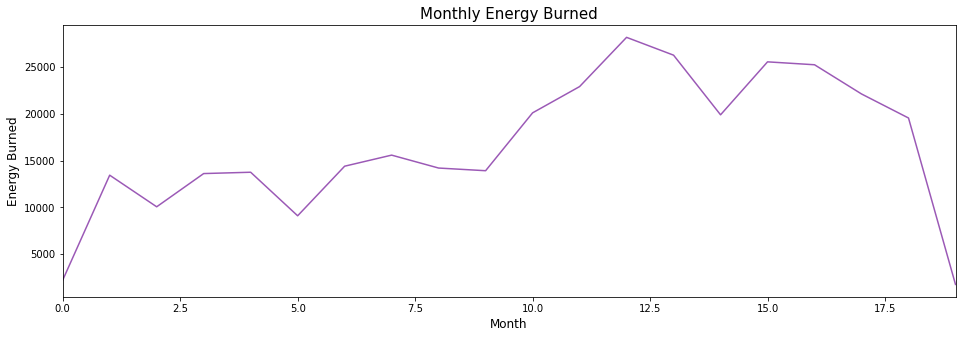

In [56]:
# Create a new dataframe for time series
monthly_df = pd.DataFrame(daily_df.groupby(by=[daily_df.index.year, daily_df.index.month]).value.sum())

fig = plt.figure(figsize=(16,5))

# Create time series chart
sns.tsplot(monthly_df.value)

# Set plot features
plt.title('Monthly Energy Burned', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Energy Burned', fontsize=12)

Definitely shows an increasing trend around fall of 2018. The levels do stay pretty high  for the rest of the months except July since it's incomplete right now as of 2019-07-05.

- What did I do around that time? 
- Could I predict how much I am going to burn monthly?

In [57]:
monthly_df

value
dailyDate dailyDate           
2017      12          2233.775
2018      1          13441.570
          2          10065.854
          3          13614.621
          4          13756.339
          5           9104.969
          6          14401.148
          7          15583.999
          8          14204.229
          9          13918.805
          10         20099.404
          11         22904.322
          12         28162.278
2019      1          26259.951
          2          19889.390
          3          25545.931
          4          25235.586
          5          22116.214
          6          19548.046
          7           1772.365

### Time Series Analysis

I want to test out Facebook's forecasting tool Prophet (if I could get it to install properly, if not then just basic testing). I've worked with Prophet in R so I have a small understanding on what's under the hood. You can check it out [here](https://facebook.github.io/prophet/docs/installation.html).

### Stationarity

Perform the Augmented Dickey-Fuller Test to test for stationarity. Stationarity ensures that the data has the same statistical properties throughout the time series such as variance, mean, autocorrelation. 

The ADF (one of the Unit Root tests, there are several more) is very powerful since it removes autocorrelation and tests for stationarity.

In [109]:
# Test for Stationarity
def stationarity_test(timeseries):
    """"
    Augmented Dickey-Fuller Test
    Test for Stationarity
    """
    
    print("Results of Dickey-Fuller Test:")
    df_test = adfuller(timeseries, autolag = "AIC")
    df_output = pd.Series(df_test[0:4],
                          index = ["Test Statistic", "p-value", "#Lags Used",
                                   "Number of Observations Used"])
    print(df_output)

In [117]:
# adfuller() function accepts only 1d array of time series so first convert it
daily_df_ts = daily_df.iloc[:,0].values

In [118]:
stationarity_test(daily_df_ts)

Results of Dickey-Fuller Test:
Test Statistic                  -2.417689
p-value                          0.136806
#Lags Used                      13.000000
Number of Observations Used    536.000000
dtype: float64


The data is not stationary, which means that the statistical property throught the time series is not stationary so it will be hard to analyze the data.

### Autocorrelation

A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot. The ACF is a way to measure the linear relationship between an observation at time t and the observations at previous times. 

In layman's, do previous observations influence next observations?

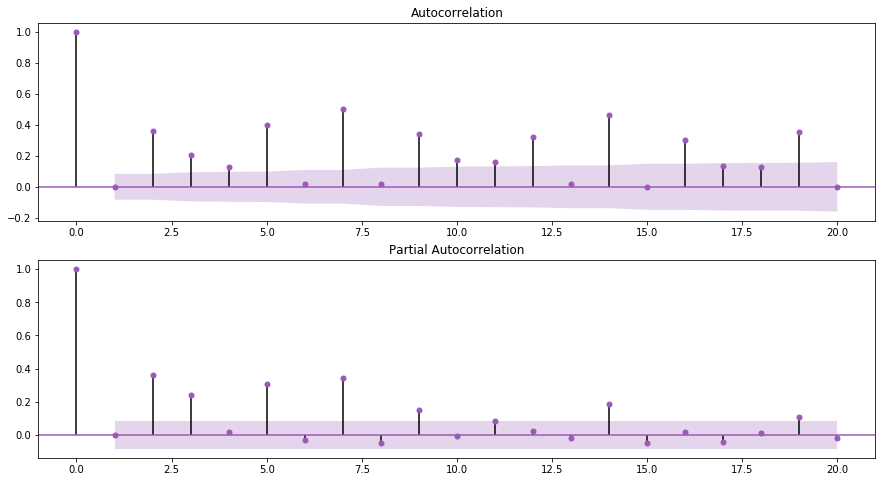

In [121]:
# Classic ACF and PACF Plots for Autocorrelation

# Autocorrelation and partical autocorrelation
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(daily_df, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(daily_df, lags=20, ax=ax2)

We want to take a look at the purple shaded region. If the points are above the line then there is autocorrelation. If we want to do forecasting on this dataset, we would need to transform the time series where it would not be autocorrelated or else the forecasting techniques would be extremely inaccurate.

## Step Count Data

Step data has always been a metric that I like to keep track of. As I live a life of non-consistent movement, I try to get some steps on a daily basis even if it's a 10-15 minute walk. Before I started studying a lot I tried to maintain a daily 20-25 minute brisk walk on the weekdays although I should be doing a lot more.

A lot of health tips and fitness blogs talk about getting at least "10,000" steps daily to remain healthy. I believe that you don't have to get 10,000 but it's the action you take to get those 10,000 is what will drive your health. If someone has that mindset that they will be doing those 10K steps then there's a higher chance that they are a little healthier if not alot, than other individuals who do not. 

- Can we tell when I went on a trip to Japan from the time series data?

In [58]:
# Get data shape, info, columns, & dimensions
print ("*"*43)
print('********** Data shape: ' + str(StepCount_data.shape) + '*'*10)

*******************************************
********** Data shape: (79977, 9)**********


In [59]:
StepCount_data.value.sum()

8716601

8.7M Steps? Hmm...

In [60]:
# Select columns
StepCount_data = pd.read_csv('Data\\StepCount.csv')
StepCount_data['DailyDate'] = StepCount_data.startDate.apply(lambda x: " ".join(x.split()[0:1]))
useful_cols = ['DailyDate', 'value']
StepCount_data = StepCount_data[useful_cols]
StepCount_data.DailyDate = pd.to_datetime(StepCount_data.DailyDate, format='%Y-%m-%d')

# Check top 5
StepCount_data.iloc[0:5,]

,DailyDate,value
0,2019-06-03,391
1,2019-06-03,117
2,2019-06-03,248
3,2015-11-29,79
4,2015-11-29,112


In [61]:
StepCount_data.DailyDate.dtype

dtype('<M8[ns]')

In [62]:
StepCount_data.set_index('DailyDate', inplace=True)
StepCount_data.head()

,value
DailyDate,
2019-06-03,391
2019-06-03,117
2019-06-03,248
2015-11-29,79
2015-11-29,112


In [63]:
# Resample by day
StepCount_data = StepCount_data.resample('D').sum()

In [64]:
print ("*"*42)
print('********** Data shape: ' + str(StepCount_data.shape) + '*'*10)

StepCount_data.head()

******************************************
********** Data shape: (1312, 1)**********


,value
DailyDate,
2015-11-29,3378
2015-11-30,5935
2015-12-01,6462
2015-12-02,4316
2015-12-03,4043


In [65]:
### Min and Max Date
print(StepCount_data.head(1))
print(StepCount_data.tail(1))

            value
DailyDate        
2015-11-29   3378
            value
DailyDate        
2019-07-02   6942


In [66]:
# Uniques
StepCount_data.index.unique()

DatetimeIndex(['2015-11-29', '2015-11-30', '2015-12-01', '2015-12-02',
               '2015-12-03', '2015-12-04', '2015-12-05', '2015-12-06',
               '2015-12-07', '2015-12-08',
               ...
               '2019-06-23', '2019-06-24', '2019-06-25', '2019-06-26',
               '2019-06-27', '2019-06-28', '2019-06-29', '2019-06-30',
               '2019-07-01', '2019-07-02'],
              dtype='datetime64[ns]', name='DailyDate', length=1312, freq='D')

### Plotting Daily Steps

<Figure size 1152x576 with 0 Axes>

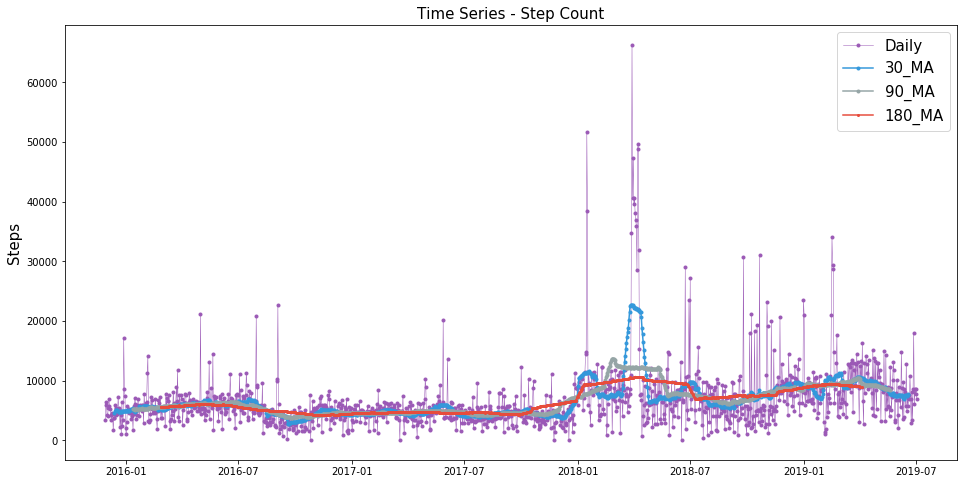

In [67]:
fig = plt.figure(figsize=(16,8))

# Rolling 30 days
ma_30 = StepCount_data["value"].rolling(window=30, center=True).mean()
ma_60 = StepCount_data["value"].rolling(window=60, center=True).mean()
ma_90 = StepCount_data["value"].rolling(window=90, center=True).mean()
ma_120 = StepCount_data["value"].rolling(window=120, center=True).mean()
ma_150 = StepCount_data["value"].rolling(window=150, center=True).mean()
ma_180 = StepCount_data["value"].rolling(window=180, center=True).mean()

# Combine moving averages with the daily data to replot
ts_step_ma_data = pd.DataFrame({'Date': StepCount_data.index,
                                 'DailyValue': StepCount_data.value,
                                 '30_MA': ma_30,
                                 '60_MA': ma_60,
                                 '90_MA': ma_90,
                                 '120_MA': ma_120,
                                 '150_MA': ma_150,
                                 '180_MA': ma_180})

# Create time series chart without moving averages
# sns.tsplot(daily_df.value)

# Create time series with moving averages
# Start and end of the date range to extract
start, end = '2015-11-29', '2019-07-02'

# Set figure space 
fig, ax = plt.subplots(figsize=(16,8))

# Create plot
ax.plot(StepCount_data['value'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(ts_step_ma_data['30_MA'], marker='o', markersize=3, linestyle='-', label='30_MA')
# ax.plot(ts_step_ma_data['60_MA'], marker='o', markersize=3, linestyle='-', label='60_MA')
ax.plot(ts_step_ma_data['90_MA'], marker='o', markersize=3, linestyle='-', label='90_MA')
# ax.plot(ts_step_ma_data['120_MA'], marker='o', markersize=2, linestyle='-', label='120_MA')
# ax.plot(ts_step_ma_data['150_MA'], marker='o', markersize=2, linestyle='-', label='150_MA')
ax.plot(ts_step_ma_data['180_MA'], marker='o', markersize=2, linestyle='-', label='180_MA')

# Set plot features
ax.set_title('Time Series - Step Count', fontsize=15)
ax.set_ylabel('Steps', fontsize=15)
ax.set_xlabel('', fontsize=15)
ax.legend(loc='upper right', prop = {'size':15})
plt.show();

There are some serious outliers that make it hard to see the data. What's going on around spring of 2018? There are multiple high peaks that is way different from every other time of the years. Let's take a look at that month.

In [68]:
# Set start and end range of the dates we want to slice
start_range = '2018-03-01'
end_range = '2018-05-01'

march_to_may_steps = StepCount_data.loc[start_range:end_range,:]

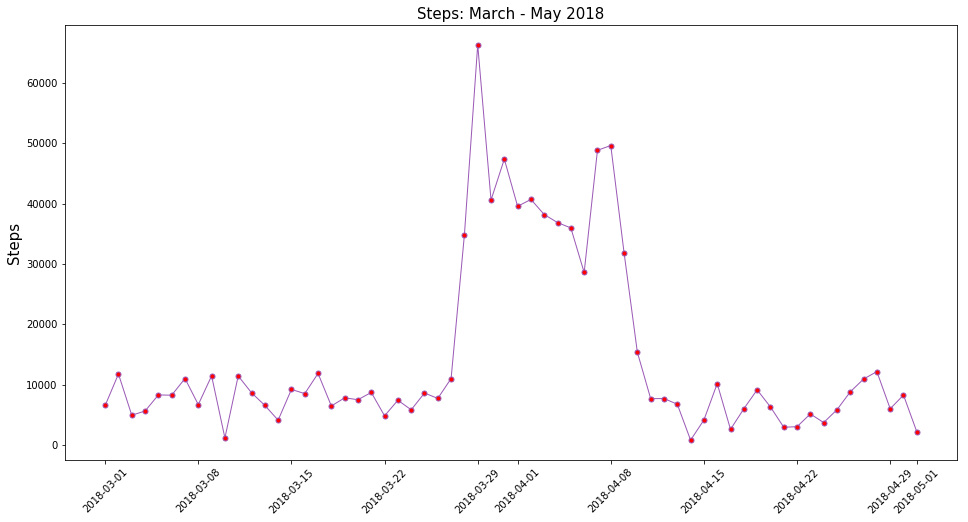

In [69]:
# Rolling 30 days
ma_30 = march_to_may_steps["value"].rolling(window=30, center=True).mean()

# Combine moving averages with the daily data to replot
ts_spring_steps_data = pd.DataFrame({'Date': march_to_may_steps.index,
                                     'DailyValue': march_to_may_steps.value,
                                     '30_MA': ma_30})

# Set figure space 
fig, ax = plt.subplots(figsize=(16,8))

# Create plot
ax.plot(march_to_may_steps['value'],
        marker='.',
        markersize=10,
        markerfacecolor='red',
        linestyle='-',
        linewidth=1,
        label='Daily')

# ax.plot(ts_spring_steps_data['30_MA'], marker='o', markersize=3, linestyle='-', label='30_MA')

# Set plot features
plt.xticks(rotation=45)
plt.title('Steps: March - May 2018', fontsize=15)
plt.ylabel('Steps', fontsize=15)
plt.show()

Now this time series looks more apparent now. But I am also skeptical on taking 60K steps. I would say I maxed out around ~30K steps from what I remember on my first couple days in Osaka/Kyoto. It was an awesome trip and definitely would revisit the country.

The high step ranges from 2018-03-28 through 2018-04-09. I think since I grouped the dates together, the numbers were that split in between the two dates also was accumulated together. For example, my walks starting before midnight and ending after midnight and the steps are only captured on the starting date. This is a possibility. When making assumptions on a dataset, you can do it before and after looking at the data. We just have to be careful on the biases that we make unconsciously with it like [confirmation bias](https://en.wikipedia.org/wiki/Confirmation_bias).

Confirmation bias is the tendency to search for, interpret, and favor information in a way that will confirm your own prexisting beliefs or hypotheses. So we will see this everywhere in the field of statistics, machine learning, marketing, psychology, and even our daily lives. 

In [70]:
# Average steps
StepCount_data.value.mean()

6643.750762195122

In [71]:
# To csv
StepCount_data.to_csv('Data\\agg_step_data.csv')

6.6k average steps isn't that bad. I thought I would be around 5k steps.

- What's the average by month?

Text(0, 0.5, 'Steps')

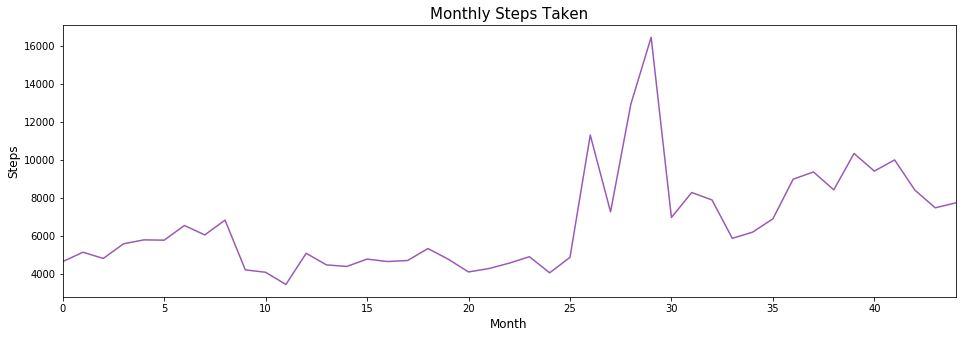

In [72]:
# Create a new dataframe for time series
monthly_steps_df = pd.DataFrame(StepCount_data.groupby(by=[StepCount_data.index.year, StepCount_data.index.month]).value.mean())

fig = plt.figure(figsize=(16,5))

# Create time series chart
sns.tsplot(monthly_steps_df.value)

# Set plot features
plt.title('Monthly Steps Taken', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Steps', fontsize=12)

In [73]:
monthly_steps_df

value
DailyDate DailyDate              
2015      11          4656.500000
          12          5147.258065
2016      1           4821.806452
          2           5592.206897
          3           5797.903226
          4           5782.600000
          5           6556.354839
          6           6057.466667
          7           6838.322581
          8           4219.258065
          9           4093.133333
          10          3452.677419
          11          5091.633333
          12          4480.451613
2017      1           4400.161290
          2           4786.071429
          3           4657.806452
          4           4712.400000
          5           5342.161290
          6           4780.966667
          7           4110.483871
          8           4287.580645
          9           4571.533333
          10          4909.967742
          11          4065.233333
          12          4876.838710
2018      1          11312.935484
          2           7273.464286
          3          12939.580645
          4          16454.733333
          5           6976.903226
          6           8289.100000
          7           7897.967742
          8           5878.741935
          9           6204.400000
          10          6904.870968
          11          8990.700000
          12          9371.806452
2019      1           8430.516129
          2          10344.857143
          3           9417.612903
          4          10005.466667
          5           8414.677419
          6           7484.800000
          7           7741.000000

## Heart Rate Data

In [107]:
HeartRate_data.iloc[1:5,:]

,value
DailyDate,
2017-12-26,88.849462
2017-12-27,80.746914
2017-12-28,80.825806
2017-12-29,81.324468


In [75]:
# Get data shape, info, columns, & dimensions
print ("*"*43)
print('********** Data shape: ' + str(HeartRate_data.shape) + '*'*10)

*******************************************
********** Data shape: (304516, 9)**********


### Define a new function to create daily date

In [76]:
# Create DailyDate feature
HeartRate_data = pd.read_csv('Data\\HeartRate.csv')

def create_daily_date(df):
    df['DailyDate'] = df.startDate.apply(lambda x: " ".join(x.split()[0:1]))
    df.DailyDate = pd.to_datetime(df.DailyDate, format='%Y-%m-%d')
    useful_cols = ['DailyDate', 'value']
    df = df[useful_cols]
    return df

In [77]:
# Create date
HeartRate_data = create_daily_date(HeartRate_data)

In [78]:
# Check top 5
HeartRate_data.head()

,DailyDate,value
0,2017-12-25,86.0
1,2017-12-25,58.0
2,2017-12-25,73.0
3,2017-12-25,72.0
4,2017-12-25,84.0


In [79]:
# Get average heart beat per day
HeartRate_data.set_index('DailyDate', inplace=True)
HeartRate_data = HeartRate_data.resample('D').mean()

In [80]:
HeartRate_data.head()

,value
DailyDate,
2017-12-25,74.000000
2017-12-26,88.849462
2017-12-27,80.746914
2017-12-28,80.825806
2017-12-29,81.324468


For the heart rate data, I am using the average rates per day. We could also group it by day and hour as well to get a more granular level view especially if I want to see which part of the day I am most active. We can save that for another time if we have any questions.

### Plot Heart Rates

In [81]:
# Get min and max dates first
print(min(HeartRate_data.index))
print(max(HeartRate_data.index))

2017-12-25 00:00:00
2019-07-02 00:00:00


<Figure size 1152x576 with 0 Axes>

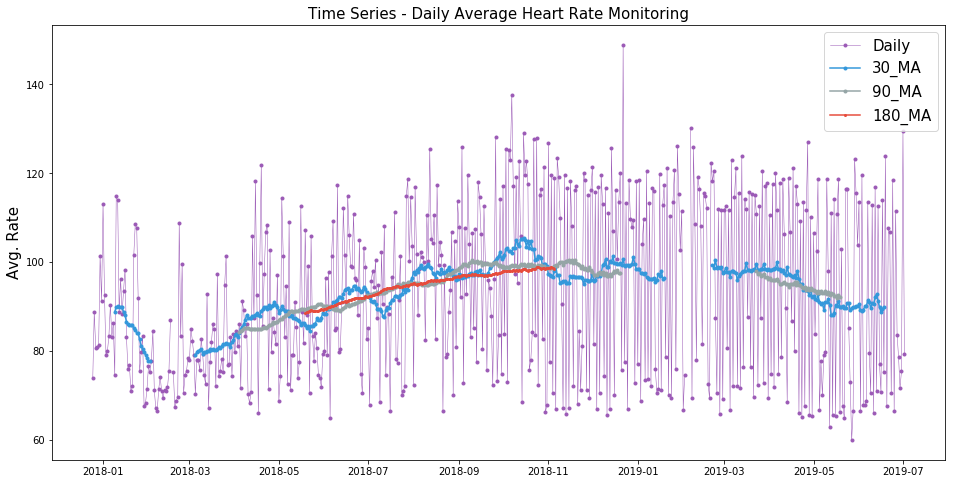

In [82]:
fig = plt.figure(figsize=(16,8))

# Rolling 30 days
ma_30 = HeartRate_data["value"].rolling(window=30, center=True).mean()
# ma_60 = HeartRate_data["value"].rolling(window=60, center=True).mean()
ma_90 = HeartRate_data["value"].rolling(window=90, center=True).mean()
# ma_120 = HeartRate_data["value"].rolling(window=120, center=True).mean()
# ma_150 = HeartRate_data["value"].rolling(window=150, center=True).mean()
ma_180 = HeartRate_data["value"].rolling(window=180, center=True).mean()

# Combine moving averages with the daily data to replot
ts_hr_ma_data = pd.DataFrame({'Date': HeartRate_data.index,
                                 'DailyValue': HeartRate_data.value,
                                 '30_MA': ma_30,
                                 '90_MA': ma_90,
                                 '180_MA': ma_180})

# Create time series chart without moving averages
# sns.tsplot(daily_df.value)

# Create time series with moving averages
# Start and end of the date range to extract
# start, end = '2015-11-29', '2019-07-02'
hr_start_date = min(HeartRate_data.index)
hr_end_date = max(HeartRate_data.index)

# Set figure space 
fig, ax = plt.subplots(figsize=(16,8))

# Create plot
ax.plot(HeartRate_data['value'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(ts_hr_ma_data['30_MA'], marker='o', markersize=3, linestyle='-', label='30_MA')
# ax.plot(ts_hr_ma_data['60_MA'], marker='o', markersize=3, linestyle='-', label='60_MA')
ax.plot(ts_hr_ma_data['90_MA'], marker='o', markersize=3, linestyle='-', label='90_MA')
# ax.plot(ts_hr_ma_data['120_MA'], marker='o', markersize=2, linestyle='-', label='120_MA')
# ax.plot(ts_hr_ma_data['150_MA'], marker='o', markersize=2, linestyle='-', label='150_MA')
ax.plot(ts_hr_ma_data['180_MA'], marker='o', markersize=2, linestyle='-', label='180_MA')

# Set plot features
ax.set_title('Time Series - Daily Average Heart Rate Monitoring', fontsize=15)
ax.set_ylabel('Avg. Rate', fontsize=15)
ax.set_xlabel('', fontsize=15)
ax.legend(loc='upper right', prop = {'size':15})
plt.show();

I'm surprised there are a lot of averaged above 100. As I look at this, I have to thinkn of ways to lower my average rates. A normal resting heart rate for adults ranges from 60 to 100 beats per minute and I definitely am going to aim for the low 60s. This tells me that I need to do more training like Ive done back in early 2018 and before where my averages were lower. An example of a well-trained athelete might have a nomral resting heart rate close to 40 BPM.

### Monthly average heart rate

Text(0, 0.5, 'Avg. Rate')

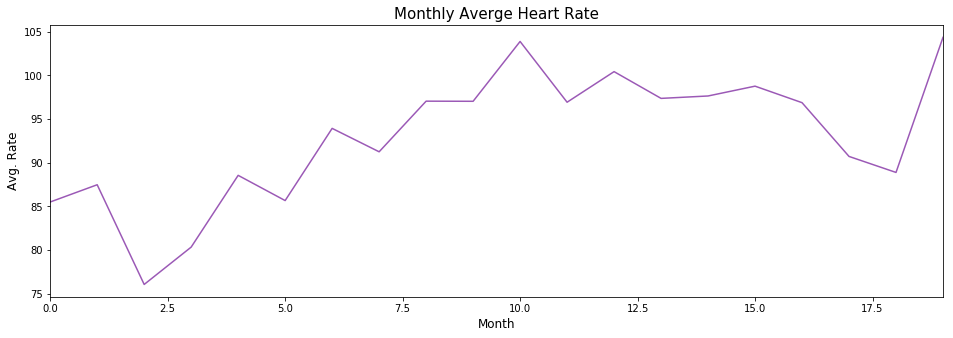

In [83]:
# Create a new dataframe for time series
monthly_hr_df = pd.DataFrame(HeartRate_data.groupby(by=[HeartRate_data.index.year, HeartRate_data.index.month]).value.mean())

fig = plt.figure(figsize=(16,5))

# Create time series chart
sns.tsplot(monthly_hr_df.value)

# Set plot features
plt.title('Monthly Averge Heart Rate', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Avg. Rate', fontsize=12)

In [84]:
monthly_hr_df

value
DailyDate DailyDate            
2017      12          85.499148
2018      1           87.473871
          2           76.056203
          3           80.332777
          4           88.550497
          5           85.661865
          6           93.929362
          7           91.247974
          8           97.046098
          9           97.031262
          10         103.883134
          11          96.924619
          12         100.428294
2019      1           97.364212
          2           97.639740
          3           98.765158
          4           96.873568
          5           90.717047
          6           88.883502
          7          104.353935

Looks like my heartrate shows some correlation in late 2018 like my other datasets showing more activity.

### What's my average heartrate?

In [85]:
HeartRate_data.value.mean()

92.71874868697108

In [86]:
# To csv
HeartRate_data.to_csv('Data\\agg_heart_rate_data.csv')

Even if the data is not 100% correct, which I know it's not but just seeing such consistent numbers across the board sets me straight. Knowing this now, I want to bring my average down by at least 28BPM. 2019 is not the year for me as I look at the monthly numbers. The lowest was in June at 88 which is still very high. I've always noticed as well as I look at my Apple watch seeing my numbers were a lot higher than people who were moving a lot more. I've talked to some people about this and compared results. One person had an average rate of high 50s.

Nonetheless, this is going to be a journey but I'm excited to see if I can do this. This will mean more exercises to bring my resting BPM to a lower level. Some medical studies on higher heart rates show that there are higher rates of deaths per day if there was an increase of average rates. The results suggested that lowering your resting heart rate over time may be beneficial, but this is always an ongoing study as patients may not be the same as the sample study. However, I do firmly believe that with right exercises, eating healthy, maintaining a lifestyle that is beneficial for your body long term will do you more good than harm.


Some ways to lower my resting heart rate:
1. Exercise more - taking walks, swim, bike, making myself more mobile throughout the day
2. Reduce stress - performing some osrt of relaxation responses that will relieve stress
3. Avoid tobacco products - smokers usually have a higher resting heart rate
4. Lose weight if necessary - the larger the body the more the heart must work to supply it with blood; slow an elevated hr
5. Eat foods that are beneficial

## Apple Exercise Time

In [87]:
# Get data shape, info, columns, & dimensions
# AppleExerciseTime_data = pd.read_csv('Data\\AppleExerciseTime.csv')
print ("*"*43)
print('********** Data shape: ' + str(AppleExerciseTime_data.shape) + '*'*10)

aet_cols = ['startDate', 'endDate', 'value']
AppleExerciseTime_data[aet_cols].head()

*******************************************
********** Data shape: (29216, 9)**********


,startDate,endDate,value
0,2017-12-25 15:28:34 -0700,2017-12-25 15:29:34 -0700,1
1,2017-12-25 15:35:44 -0700,2017-12-25 15:36:44 -0700,1
2,2017-12-25 15:44:13 -0700,2017-12-25 15:45:13 -0700,1
3,2017-12-25 15:50:24 -0700,2017-12-25 15:51:24 -0700,1
4,2017-12-25 16:36:24 -0700,2017-12-25 16:37:24 -0700,1


In [88]:
AppleExerciseTime_data = create_daily_date(AppleExerciseTime_data)

In [89]:
# Get average heart beat per day
AppleExerciseTime_data.set_index('DailyDate', inplace=True)
AppleExerciseTime_data = AppleExerciseTime_data.resample('D').sum()

In [90]:
AppleExerciseTime_data.value.sum()

29216

I'm not sure on how to interprate the start and end dates on this so I will just move along now since it's not tracking the time I logged a workout, which I do have a CSV file for so we will check that one out instead.

## Workout

In [91]:
# Get data shape, info, columns, & dimensions
# Workout_data = pd.read_csv('Data\\Workout.csv')
print ("*"*43)
print('********** Data shape: ' + str(Workout_data.shape) + '*'*10)

wo_cols = ['startDate', 'workoutActivityType', 'duration', 'totalEnergyBurned']
Workout_data = Workout_data[wo_cols]

*******************************************
********** Data shape: (281, 13)**********


In [92]:
Workout_data.head()

,startDate,workoutActivityType,duration,totalEnergyBurned
0,2018-01-01 16:07:27 -0700,HKWorkoutActivityTypeTraditionalStrengthTraining,80.685043,475.868
1,2018-01-08 18:54:11 -0700,HKWorkoutActivityTypeTraditionalStrengthTraining,38.375456,182.479
2,2018-01-10 18:43:55 -0700,HKWorkoutActivityTypeOther,98.125481,659.538
3,2018-01-11 19:18:43 -0700,HKWorkoutActivityTypeTraditionalStrengthTraining,52.914278,371.048
4,2018-01-16 13:03:36 -0700,HKWorkoutActivityTypeWalking,450.750580,671.063


In [93]:
# Average duration
Workout_data.duration.mean()

81.29370828100515

In [94]:
# Average energy burned
Workout_data.totalEnergyBurned.mean()

560.4978287721284

In [95]:
# To csv
Workout_data.to_csv('Data\\agg_workout_1_data.csv')

In [96]:
# Get daily date
def create_daily_date_v2(df):
    df['DailyDate'] = df.startDate.apply(lambda x: " ".join(x.split()[0:1]))
    df.DailyDate = pd.to_datetime(df.DailyDate, format='%Y-%m-%d')
    useful_cols = ['DailyDate', 'workoutActivityType', 'duration', 'totalEnergyBurned']
    df = df[useful_cols]
    return df

In [97]:
Workout_data_v2 = create_daily_date_v2(Workout_data)

In [98]:
Workout_data_v2.head()

,DailyDate,workoutActivityType,duration,totalEnergyBurned
0,2018-01-01,HKWorkoutActivityTypeTraditionalStrengthTraining,80.685043,475.868
1,2018-01-08,HKWorkoutActivityTypeTraditionalStrengthTraining,38.375456,182.479
2,2018-01-10,HKWorkoutActivityTypeOther,98.125481,659.538
3,2018-01-11,HKWorkoutActivityTypeTraditionalStrengthTraining,52.914278,371.048
4,2018-01-16,HKWorkoutActivityTypeWalking,450.750580,671.063


In [99]:
# To csv
Workout_data_v2.to_csv('Data\\agg_workout_2_data.csv')

<Figure size 1152x576 with 0 Axes>

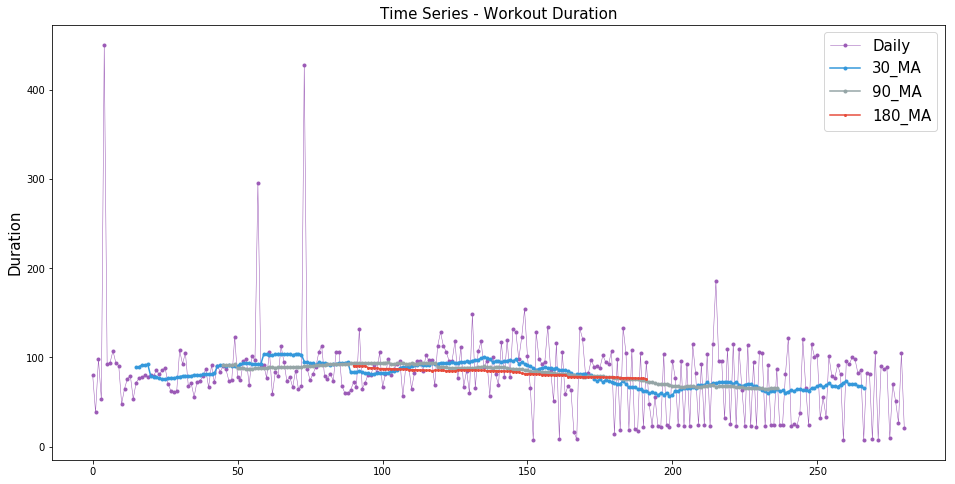

In [100]:
fig = plt.figure(figsize=(16,8))

# Rolling 30 days
ma_30 = Workout_data_v2["duration"].rolling(window=30, center=True).mean()
# ma_60 = Workout_data_v2["duration"].rolling(window=60, center=True).mean()
ma_90 = Workout_data_v2["duration"].rolling(window=90, center=True).mean()
# ma_120 = Workout_data_v2["duration"].rolling(window=120, center=True).mean()
# ma_150 = Workout_data_v2["duration"].rolling(window=150, center=True).mean()
ma_180 = Workout_data_v2["duration"].rolling(window=180, center=True).mean()

# Combine moving averages with the daily data to replot
ts_wo_ma_data = pd.DataFrame({'Date': Workout_data_v2.index,
                                 'Duration': Workout_data_v2.duration,
                                 '30_MA': ma_30,
                                 '90_MA': ma_90,
                                 '180_MA': ma_180})

# Create time series chart without moving averages
# sns.tsplot(daily_df.value)

# Create time series with moving averages
# Start and end of the date range to extract
# start, end = '2015-11-29', '2019-07-02'
hr_start_date = min(Workout_data_v2.index)
hr_end_date = max(Workout_data_v2.index)

# Set figure space 
fig, ax = plt.subplots(figsize=(16,8))

# Create plot
ax.plot(Workout_data_v2['duration'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(ts_wo_ma_data['30_MA'], marker='o', markersize=3, linestyle='-', label='30_MA')
# ax.plot(ts_wo_ma_data['60_MA'], marker='o', markersize=3, linestyle='-', label='60_MA')
ax.plot(ts_wo_ma_data['90_MA'], marker='o', markersize=3, linestyle='-', label='90_MA')
# ax.plot(ts_wo_ma_data['120_MA'], marker='o', markersize=2, linestyle='-', label='120_MA')
# ax.plot(ts_wo_ma_data['150_MA'], marker='o', markersize=2, linestyle='-', label='150_MA')
ax.plot(ts_wo_ma_data['180_MA'], marker='o', markersize=2, linestyle='-', label='180_MA')

# Set plot features
ax.set_title('Time Series - Workout Duration', fontsize=15)
ax.set_ylabel('Duration', fontsize=15)
ax.set_xlabel('', fontsize=15)
ax.legend(loc='upper right', prop = {'size':15})
plt.show();

<Figure size 1152x576 with 0 Axes>

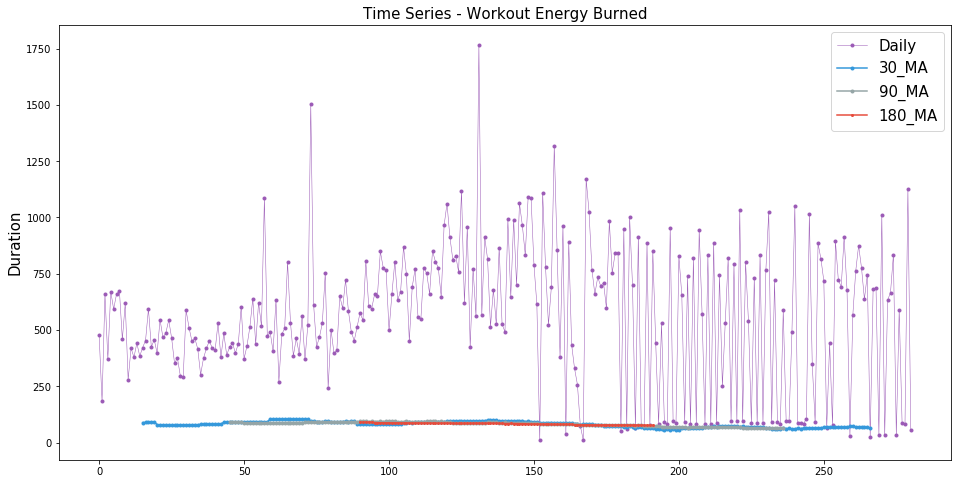

In [101]:
fig = plt.figure(figsize=(16,8))

# Rolling 30 days
ma_30 = Workout_data_v2["totalEnergyBurned"].rolling(window=30, center=True).mean()
# ma_60 = Workout_data_v2["totalEnergyBurned"].rolling(window=60, center=True).mean()
ma_90 = Workout_data_v2["totalEnergyBurned"].rolling(window=90, center=True).mean()
# ma_120 = Workout_data_v2["totalEnergyBurned"].rolling(window=120, center=True).mean()
# ma_150 = Workout_data_v2["totalEnergyBurned"].rolling(window=150, center=True).mean()
ma_180 = Workout_data_v2["totalEnergyBurned"].rolling(window=180, center=True).mean()

# Combine moving averages with the daily data to replot
ts_wod_ma_data = pd.DataFrame({'Date': Workout_data_v2.index,
                                 'Duration': Workout_data_v2.totalEnergyBurned,
                                 '30_MA': ma_30,
                                 '90_MA': ma_90,
                                 '180_MA': ma_180})

# Create time series chart without moving averages
# sns.tsplot(daily_df.value)

# Create time series with moving averages
# Start and end of the date range to extract
# start, end = '2015-11-29', '2019-07-02'
hr_start_date = min(Workout_data_v2.index)
hr_end_date = max(Workout_data_v2.index)

# Set figure space 
fig, ax = plt.subplots(figsize=(16,8))

# Create plot
ax.plot(Workout_data_v2['totalEnergyBurned'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(ts_wo_ma_data['30_MA'], marker='o', markersize=3, linestyle='-', label='30_MA')
# ax.plot(ts_wo_ma_data['60_MA'], marker='o', markersize=3, linestyle='-', label='60_MA')
ax.plot(ts_wo_ma_data['90_MA'], marker='o', markersize=3, linestyle='-', label='90_MA')
# ax.plot(ts_wo_ma_data['120_MA'], marker='o', markersize=2, linestyle='-', label='120_MA')
# ax.plot(ts_wo_ma_data['150_MA'], marker='o', markersize=2, linestyle='-', label='150_MA')
ax.plot(ts_wo_ma_data['180_MA'], marker='o', markersize=2, linestyle='-', label='180_MA')

# Set plot features
ax.set_title('Time Series - Workout Energy Burned', fontsize=15)
ax.set_ylabel('Duration', fontsize=15)
ax.set_xlabel('', fontsize=15)
ax.legend(loc='upper right', prop = {'size':15})
plt.show();

In [102]:
Workout_data_v2.groupby('workoutActivityType').mean()

,duration,totalEnergyBurned
workoutActivityType,,
HKWorkoutActivityTypeBoxing,102.755224,851.777076
HKWorkoutActivityTypeHiking,49.599149,220.204558
HKWorkoutActivityTypeOther,92.350685,750.929426
HKWorkoutActivityTypeRunning,8.026748,11.227024
HKWorkoutActivityTypeSwimming,7.551111,12.129627
HKWorkoutActivityTypeTraditionalStrengthTraining,88.125674,483.515296
HKWorkoutActivityTypeWalking,36.036799,94.545217


In [103]:
Workout_data_v2.groupby('workoutActivityType')['DailyDate'].count()

workoutActivityType
HKWorkoutActivityTypeBoxing                           1
HKWorkoutActivityTypeHiking                           3
HKWorkoutActivityTypeOther                          150
HKWorkoutActivityTypeRunning                          1
HKWorkoutActivityTypeSwimming                         1
HKWorkoutActivityTypeTraditionalStrengthTraining     81
HKWorkoutActivityTypeWalking                         44
Name: DailyDate, dtype: int64

I usually log my gym workouts as "Others" so we can consider all of those as gym sessions. I may have logged strength training early on but switched to "other". I usually try to log some of my walks as well if I am committed to walking a certain amount of duration or length especially at work. If I am out or the purpose isn't exercise then I usually do not log it.

## Summary

So now we have taken a look at some of the datasets of my health activities such as exercises and my heart rates. It was surprising to see how high my average heart rates are so I am definitely going to be more proactive in trying to reduce it as much as I can. This was an observation that was useful, because I can be more aware now on what I am doing on a daily basis. Should I do more cardiovascular exercises like HITT? Long distance running? It all depends since I still need to work on aligning my pelvic structure (long-term issue). 

One thing I was not able to do was try out time series analysis and forecasting with Facebok's Prophet forecasting tool. Although I do think that it may not be the best one to use because it works best with time series that have strong seasonal effects and several seasons of historical data. My data is definitely not seasonal as I know I don't have a set schedule but who knows?

I also exported my aggregated data out to CSV files so we can use it for our Tableau visualizations, although I will need to save it as XLSX instead. 

There are so many more observations and improvements that can be made for this notebook. My intention for this specific analysis was to take a holistic view on what I've done in the past few years with the data collected and I am satisfied with the results.

# Onwards to neural nets!
After a few quick notebooks on machine learning and handwriting some notes.... 